# Introducción a diferencias finitas - Parte B
### Juan S. Hincapié - Carlos Duque-Daza

## ¿Qué es el método de diferencias finitas?

<div align='justify'> El método de las diferencias finitas es utilizado para calcular de manera numérica las soluciones a las ecuaciones diferenciales usando ecuaciones algebraicas. Lo primero que se debe hacer para empezar a usar este método es obtener los esquemas de diferencias finitas que reemplazaran las derivadas infinitesimales y luego, aplicar dichos esquemas en cada uno de los nodos del dominio discretizado. ¿Cómo se obtienen los esquemas? Usando la serie de Taylor</div>

## Esquemas espaciales
Las más conocidas son:

$$
\begin{aligned}
& \text{Forward Finite Difference: } \frac{d\phi}{dx} \approx \frac{\phi_{i+1}-\phi_{i}}{\Delta x} +  O(\Delta x) \\
& \text{Backward Finite Difference: }    \frac{d\phi}{dx} \approx \frac{\phi_{i}-\phi_{i-1}}{\Delta x} +  O(\Delta x) \\
& \text{Central Finite Difference: } \frac{d\phi}{dx} \approx \frac{\phi_{i+1}-\phi_{i-1}}{2\Delta x} +  O(\Delta x)^2 
\end{aligned}
$$

## Esquemas temporales

<div align='justify'> Los esquemas anteriores sirven para aproximar derivadas espaciales. ¿Qué hacemos con las derivadas temporales? Debemos seguir usando Euler en sus diferentes versiones:</div>

Tenindo la siguiente EDP:
$$
\frac{d\phi}{dt} = f (t,x,\phi)
$$

Esquema explícito (Euler hacia adelante):
$$
    \frac{\phi^{n+1}_{i}-\phi^{n}_{i}}{\Delta t} = f_i^{n} (t,x,\phi)
$$

Esquema implícito (Euler hacia atrás):
$$
    \frac{\phi^{n+1}_{i}-\phi^{n}_{i}}{\Delta t} = f_i^{n+1} (t,x,\phi)
$$

## ¡Suubámosle el nivel!

* Discretice la EDP de transporte convectivo usando el esquema implícito para las derivadas parciales temporales, y esquemas de diferencias finitas hacia atrás para las derivadas parciales espaciales.


$$
    \frac{\partial \phi}{\partial t} + c \frac{\partial \phi}{\partial x}  = 0
$$

La condición de frontera:
* $\phi(t,0) = 0$ 

Condiciones iniciales:
* $\phi = 2$ para $0.5 \leq x \leq 1.0$ y $\phi = 0$ en el resto del dominio

Y para facilitar la lectura de las ecuaciones algebraicas, usamos la siguiente asignación $\beta = \frac{c\Delta t}{\Delta x}$

## ¿Por dónde empezamos?

Nuestro dominio espacial 1D tiene 6 nodos:

<div align='center'> 0--------1--------2--------3--------4--------5--------6</div><br>

<div align='justify'>Empezamos resolviendo las ecuaciones desde el nodo 1, dado que el valor de $\phi$ en el nodo 0 ya se conoce por la condición de Dirichlet. </div>

\begin{align*}
    & i=1 \rightarrow - \beta \, \phi^{n+1}_{0} + \phi^{n+1}_{1} + \beta\, \phi^{n+1}_{1} = \phi^{n}_{1}\\
    & i=2 \rightarrow - \beta \, \phi^{n+1}_{1} + \phi^{n+1}_{2} + \beta\, \phi^{n+1}_{2} = \phi^{n}_{2} \\
    & \vdots \\
    & i=5 \rightarrow - \beta \, \phi^{n+1}_{4} + \phi^{n+1}_{5} + \beta \, \phi^{n+1}_{5} = \phi^{n}_{5} \\
    & i=6 \rightarrow - \beta \, \phi^{n+1}_{5} + \phi^{n+1}_{6} + \beta \, \phi^{n+1}_{6} = \phi^{n}_{6}
\end{align*}


<div align='justify'>¿Cómo podemos representar este sistema de ecuaciones de manera matricial? Lo primero es factorizar por factor común: </div>

\begin{align*}
    & i=1 \rightarrow -\beta \, \phi^{n+1}_{0} + (1+\beta)\phi^{n+1}_{1} = \phi^{n}_{1}\\
    & i=2 \rightarrow -\beta \, \phi^{n+1}_{1} + (1+\beta)\phi^{n+1}_{2} = \phi^{n}_{2} \\
    & \vdots \\
    & i=6 \rightarrow - \beta \, \phi^{n+1}_{5} + (1+\beta)\phi^{n+1}_{6} = \phi^{n}_{6}
\end{align*}

Posteriormente pasamos a la derecha los $\phi$ que conocemos por las condiciones del tipo Dirichlet. Para este caso en particular, sólo pasamos a la derecha el término $ \beta \, \phi^{n+1}_{0}$:

\begin{align*}
    & i=1 \rightarrow (1+\beta)\phi^{n+1}_{1} = \phi^{n}_{1}  + \beta \phi^{n+1}_{0}\\
    & i=2 \rightarrow -\beta \, \phi^{n+1}_{1} + (1+\beta)\phi^{n+1}_{2} = \phi^{n}_{2} \\
    & \vdots \\
    & i=6 \rightarrow -\beta \, \phi^{n+1}_{5} + (1+\beta)\phi^{n+1}_{6} = \phi^{n}_{6}
\end{align*}


<div align='justify'>Luego, montamos nuestra matriz de coefieciente, que va a estar multiplicada por el vector de incógnitas del sistema e igualada al vector de velocidad del presente:</div>

$$
\left[\begin{array}{ccccccc}
(1+ \beta) & 0 & 0 & 0 & 0 & 0  \\
-\beta & (1+\beta) & 0 & 0 & 0 & 0   \\
0 & -\beta & (1+\beta) & 0 & 0 & 0  \\
0 & 0 & -\beta & (1+\beta) & 0 & 0  \\
0 & 0 & 0 & -\beta & (1+\beta) & 0   \\
0 & 0 & 0 & 0 &-\beta & (1+\beta)  
\end{array}\right]\cdot
\left[\begin{array}{c}
\phi_{1}\\
\phi_{2}\\
\phi_{3}\\
\phi_{4}\\
\phi_{5}\\
\phi_{6}
\end{array}\right] ^{\,n+1} = 
\left[\begin{array}{c}
\phi^n_{1}+\beta\, \phi^{n+1}_{0}\\
\phi^n_{2}\\
\phi^n_{3}\\
\phi^n_{4}\\
\phi^n_{5}\\
\phi^n_{6}
\end{array}\right]
$$

<div align='justify'>¿Qué se debe hacer para resolver este sistema de ecuaciones?</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

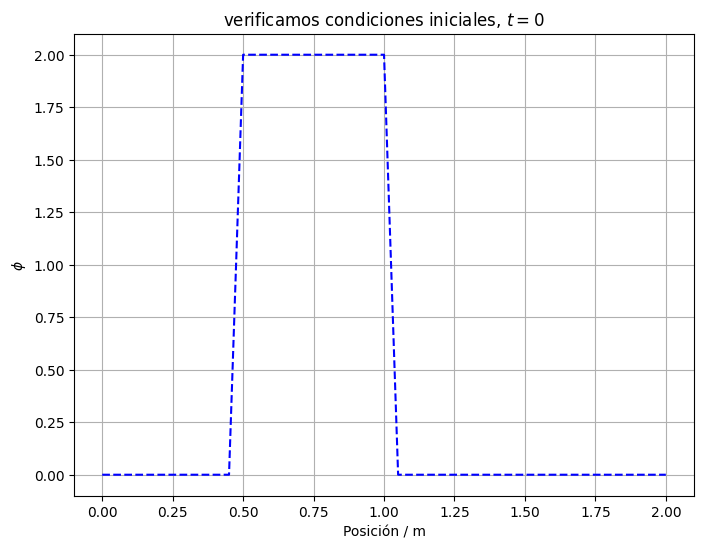

In [2]:
# Paso 00: discretizar el dominio espacial
x0 = 0; xf = 2; dx = 0.05


# Paso 01: discretizar el dominio temporal
t0 = 0; tf = 1.0; dt = 0.02


# Paso 02: asumir velocidad de la onda


# Paso 03: crear vector de velocidad almacenar
# el valor de la velocidad en cada punto discreto


# Paso 04: incluimos condiciones inciales


# Paso 05: verificar condiciones iniciales



<div align='justify'>Antes de continuar con nuestro programa, es preciso respondernos la pregunta ¿Y cómo automatizo el llenado de la matriz de coeficientes? ¿Hay algún patrón para llenar la diagonal principal? ¿Hay algún patrón para llenar la diagonal que está a la izquierda de la diagonal principal?</div>

In [9]:
# Paso 06: hacemos un vector de tiempo para almacenar el futuro


# Paso 08: creamos una matriz para almacenar los coeficientes


# Paso 09: llenamos la matriz




# Paso 09: resolvemos todo el problema
for n in range(1, len(t)):
    # Llenamos el vector de cargas

    # Resolvemos sistema de ecauciones

    # Actualizamos


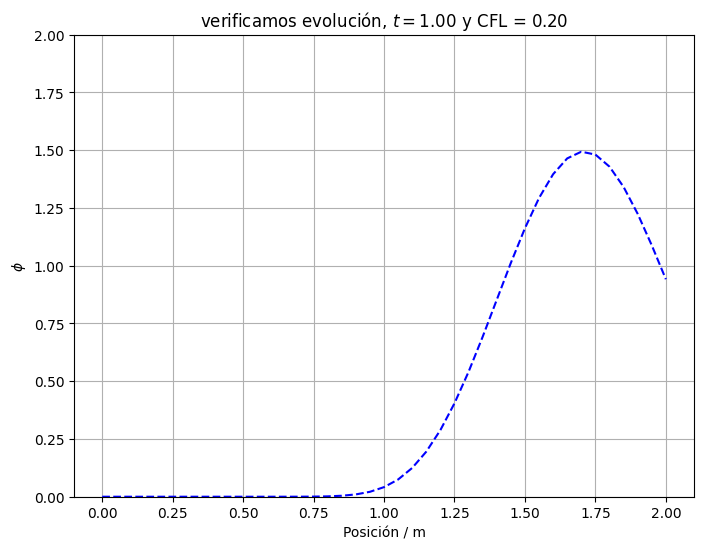

In [10]:
# Paso 09: plotear


## Actividad
* ¿Podría poner el solucionador en una función? De este modo es más cómo llevar a cabo los experimentos numéricos.

Simule para $t_f = 1.00 \, s$ para los siguientes experimentos numéricos:

* ¿Qué ocurre si $dt=0.05$, $dx=0.05$ y $c = 0.8 \, m/s$? El fenómeno se llama difusión numérica o artificial
* ¿Qué ocurre si $dt=0.05$, $dx=0.05$ y $c = 1.0 \, m/s$? ¿Si es el comportamiento correcto?
* ¿Qué ocurre si $dt=0.05$, $dx=0.05$ y $c = 1.2 \, m/s$? ¡Qué rayos!

In [18]:
def solucionador01(x0,xf,dx,t0,tf,dt,c):
    x = np.arange(x0, xf+dx, dx)
    t = np.arange(t0, tf+dt, dt)
    
    phiPre = np.zeros(len(x))
    phiPre[int(0.5/dx):int(1/dx + 1)] = 2
    
    phiFut = np.zeros(len(x))

    incog = len(x)-1
    A = np.zeros((incog,incog))
    b = np.zeros(incog)

    beta = c*dt/dx

    rows, cols = A.shape
    for j in range(0,rows):
        for i in range(0, cols):
            if j==i:
                A[j,i] = (1+beta)
                if j>0:
                    A[j,i-1] = -beta

    invA = np.linalg.inv(A)

    for n in range(1, len(t)):
        # Llenamos el vector de cargas
        b[0] = phiPre[1] + phiPre[0]*beta
        b[1:] = phiPre[2:]
        # Resolvemos sistema de ecauciones
        phiFut[1:] = np.dot(invA, b)
        # Actualizamos
        phiPre = phiFut.copy()

    return phiFut,x

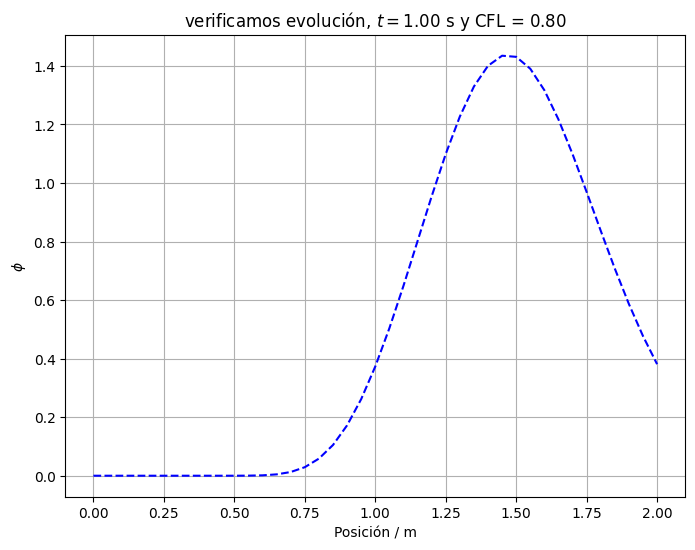

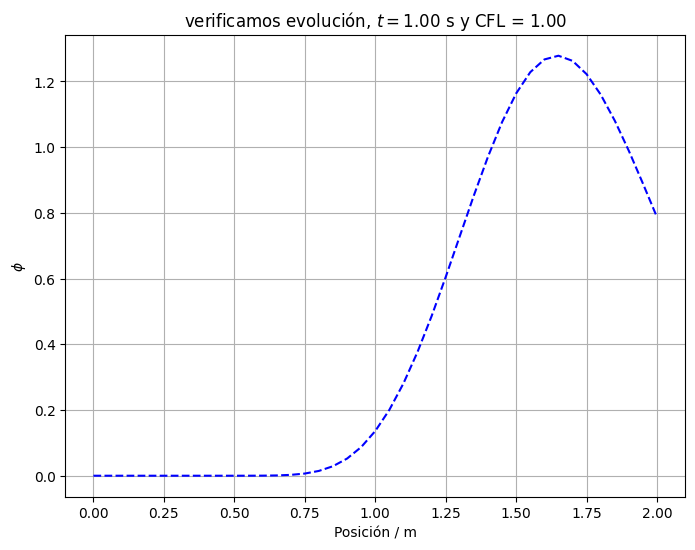

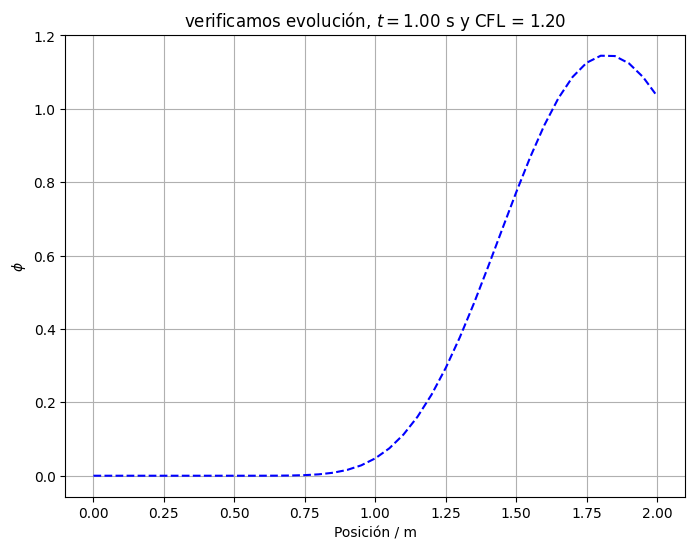

## ¿Cómo sabemos si estamos en lo correcto?

<div align='justify'> Si queremos estar seguros del comportamiento físico de la solución numérica, entonces debemos obtener la solución analítica a la ecuación de transporte por convección. Afortunadamente, la solución analítica es sencillamente:</div>

$$
    \phi(x,t) = I(x - ct)
$$
<br>
<div align='justify'>Donde $I$ es la función gorro, $x$ es la posición, $c$ es la velocidad de fluido y $t$ es el tiempo. Por cierto, es $I$ en función de y no $I$ mulplicado por...</div>

<div align='justify'>Para la prueba usemo $\Delta x = 0.02$, $\Delta t = 0.01$ y $c = 2.0 \, m/s$. El tiempo final de la simulación es $0.5 \, s$ </div>


In [56]:
def solucionAnalit(x0,xf,dx,t0,tf,dt,c):
    x = np.arange(x0, xf+dx, dx)
    t = np.arange(t0, tf+dt, dt)

    # Definir función gorro
    I = np.zeros(len(x))
    
    I[:] = 2*((x-c*tf)>=0.5) - 2*((x-c*tf)>1.0)

    
    return I,x

In [64]:
# Parámetros acá


In [65]:
# Llamar la función para la solución numérica y para la analítica


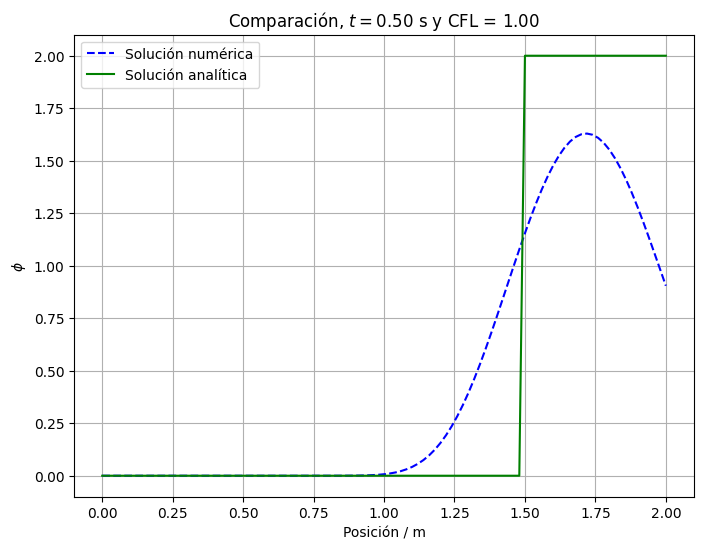

In [66]:
# Graficar


## Comentarios finales

<div align='justify'>De los resultados podemos observar un comportamiento algo raro... como una especie de difusión. ¡Así es! Se llama difusión numérica o artificial. Lo que en realidad debería ocurrir, es que la cantidad $\phi$ se transportara en la forma de la función gorro. Sin embargo, lo que estamos presenciando es un transporte convectivo y difusivo al mismo tiempo, a pesar de que nunca hemos añadido un término convectivo en el modelo. </div> <br>


<div align='justify'>Otra situación que llama la atención, es que no se ha logrado una solución exacta con el número de Courant igual a $1.0$. ¿Recuerdan que para el método FTFS si obtenía una solución exacta? </div> <br>